<a href="https://colab.research.google.com/github/juliazhu09/Python4ML/blob/master/Python_for_Machine_Learning_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Machine learning using Keras

### Xiaojuan Zhu
### OIT Research Computing Support
### Help Desk: 865-974-9900 

What is deep learning? **Deep learning** is part of a broader family of machine learning methods based on artificial neural networks with representation learning (from wikipedia). Other definition: deep learning is a subset of machine learning, which is essentially a neural network with three or more layers. 

![image](https://drive.google.com/uc?id=18XKo5lP-5onZTlAAE26VJQd9-xqZZX99&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

This is an artificial neural network structure. It contains an **input layer** which input the data into the network, an **output layer** which provides the output from the neural network, and several **hidden layers** in between the input and output layers. 
Each layer contains several nodes and the nodes are fundamental component  of the neural network, called neuron. Let us look at one single neuron unit.  

![image](https://drive.google.com/uc?id=13nkF1ZUfcJhKw_jNk6Qmy65m2f3IACrq&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

$x1$ and $x2$ are two input variables. $w1$ and $w2$ are two variables' **weight**. $b1$ is a constant value, called **bias**. Here the neuron will compute $ x1 \times w1+x2 \times w2+b1$ and put the value to $z$. $a$ is the output of the network, and the tranformation fuction to map the weighted sum (z) to a nonlinear space.  Non-linear transformations are called **activation functions**. 

Let's work on a simple linear example, **x1** and **x2** are 1 and 2 and the weights are 1 and 2 as well, **b** is 0. so **z** is 5 and the output **a** is 5. If the output **a** connects to another neuron the **a** will be the input of the neuron. 

![image](https://drive.google.com/uc?id=13rstCWEjJKJH2ZybXYj4LYjKwEDg9gSc&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)


In [ ]:
%tensorflow_version 2.3.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.3.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
# install scikti-learn package in colab
!pip install scikit-learn

## Build a Linear Regression

Here, X is the input and y is the output.

| x1 | x2 | y  |
|----|----|----|
| 1  | 2  | 5  |
| 4  | 5  | 14 |
| 2  | 3  | 8  |
| 21 | 22 | 65 |
| 5  | 5  | 15 |

Given the training set you could easily guess that the output (y) is (x1 + 2````*````x2 ).



## Example: Define a Linear Regression
The easiest way to create a model in Keras is through keras.Sequential, which creates a neural network as a stack of layers. We can create models like those above using a dense layer.

We could define a linear model accepting three two features ('x1', and 'x2') and producing a single output ('y') like so:



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[2])
])

In [ ]:
# Check the model's weight and bias
w, b = model.weights
print("Weights\n{}\nBias\n{}".format(w,b))

Weights
<tf.Variable 'dense_16/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.1834979 ],
       [-0.72731096]], dtype=float32)>
Bias
<tf.Variable 'dense_16/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


Here we make one layer linear regression model. Next we need to make our model deep by adding more layers. We can think of each layer as performing some kind of data transformation. Through multple layers, the inputs will be transformed into a complex way and getting the output data closer to a solution. Next we will make an one hidden layer neural network model with 10 neurons. 

In [ ]:
# We will build one hidden layer regression model with 10 neurons.   

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden layers
    layers.Dense(units=10, activation='linear', input_shape=[2]),
    # the linear output layer 
    layers.Dense(units=1),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


# Loss function
We have created our network, next we need to train our model. Before we train our model, we need to know how a neural network model learn and improve itself. Neural network use a **"loss function"** to measures how good the networks' performance are, which measures the disparity between the the target's true value and the value the model predicts.
A common loss function for regression problems is the mean square error or MSE. $ MSE = (y_{true} - y_{pred})^2 $.



## Optimizer
And the model uses "optimizer" that can tell the network how to change its weights.

Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent(SGD)**. The training algorithm steps:

1. Sample some training data and run the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Update the weights in a direction that makes the loss smaller.

Then repeat the three steps until the number of iterations/**epochs** is reached or the loss is below a predefined threshold. 

**Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

Now we know everything we need to start training deep learning models. 


In [ ]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')



## Generate the data

In [ ]:
# import randint function from random package
from random import randint
import numpy as np

NumObs = 200
# Create two empty list to storage training input and output data 
TrainInput = list()
TrainOutput = list()
# create error terms
err = np.zeros(NumObs)

#err = np.random.normal(0, 10, NumObs)

# Generate 1000 random set of x1 and x2
for i in range(NumObs):
    x1 = randint(0, 1000) # generate random integers between 0 and 1000. 
    x2 = randint(0, 1000)
    y = x1 + (2*x2) + err[i]
    #append method is to add x1 and x2 to the Train list.
    TrainInput.append([x1, x2]) 
    TrainOutput.append(y)
X = np.array(TrainInput)
y = np.array(TrainOutput)

In [ ]:
X[:6]

array([[ 99, 465],
       [894, 863],
       [246, 729],
       [951, 763],
       [478,  38],
       [561, 231]])

In [ ]:
y[:6]

array([1029., 2620., 1704., 2477.,  554., 1023.])

Next, we will train the model with 300 epochs.

In [ ]:
# fit the model
history = model.fit(X, y, validation_split= 0, epochs=100, verbose=1)

Epoch 1/300
7/7 [==============================] - 1s 2ms/step - loss: 2506135.2500
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 2371143.7500
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 2242424.7500
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 2116505.5000
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 1998799.2500
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 1884971.5000
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 1775283.3750
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 1668234.5000
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 1569789.7500
Epoch 10/300
7/7 [==============================] - 0s 2ms/step - loss: 1473986.7500
Epoch 11/300
7/7 [==============================] - 0s 2ms/step - loss: 1378587.3750
Epoch 12/300
7/7 [==============================] - 0s 2ms/step - loss: 12

## The plot of the loss changing over the epochs. 

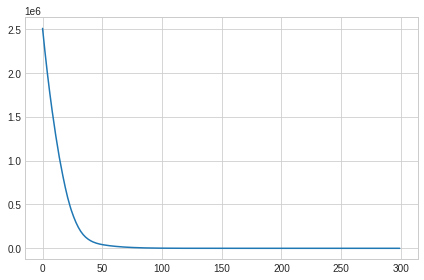

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## Test the Model using Test Data
X = [[10, 20]]

The outcome should be 10+2*20 =50. Let us see what we get.



In [ ]:
# Test data
Xtest =np.array([[10, 20]])
# test the model by predicting the test data model.predict(Xtest)
Outcome = model.predict(Xtest)
# print the outcome
print('Outcome: {}'.format(Outcome))

Outcome: [[51.35095]]


Next, we will use python function to define a regression model with two hidden layers with 10 neurons each. 



In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/Python Kares workshop"
sys.path.append(os.path.abspath(py_file_location))


In [ ]:
import q

q.hint1()

#the hidden ReLU layers
layers.Dense(units=10, activation='linear', input_shape=[2]),
layers.Dense(units=10, activation='linear'),
#the output layer
layers.Dense(units=1)


In [ ]:
# We will build a two hidden layers regression model with 4 neurons and 3 neurons.   

from tensorflow import keras
from tensorflow.keras import layers
# define regression model
# create model
model = keras.Sequential([
  # the hidden ReLU layers
 
  # the linear output layer 
 
])
    
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# hint
#the hidden ReLU layers
# layers.Dense(units=10, activation='linear', input_shape=[2]),
# layers.Dense(units=10, activation='linear'),
#the output layer
# layers.Dense(units=1)

In [ ]:
# fit the model
history = model.fit(X, y, epochs=100, verbose=0)

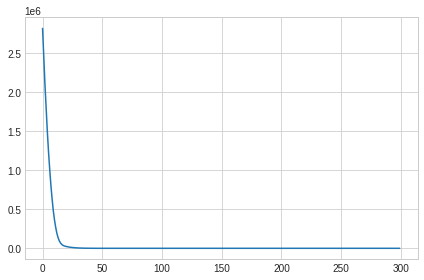

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [ ]:
# Test data
Xtest =np.array([[10, 20]])
# test the model by predicting the test data model.predict(Xtest)
Outcome = model.predict(Xtest)
# print the outcome
print('Outcome: {}'.format(Outcome))

Outcome: [[50.762634]]


After adding one more layer, we can see loss function drop quickly than the previous model and the outcome is closer to the true values. 

## Classification Models with Keras

## A Simple Classification Problem

**Supervised learning:** you train the machine using data which is well "labeled." It means some data is already tagged with the correct answer. It can be compared to learning which takes place in the presence of a supervisor or a teacher. 

Supervised learning classified into two categories of algorithms:

**Regression:** A regression problem is when the output variable is a real value, such as “dollars” or “weight”.

**Classification:** A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.
For instance, suppose you are given a basket filled with different kinds of fruits and ask you to train the model and then to predict the fruit type using test data. 

In neural network model, the regression model has one output variable but the classification model have multiple output variables instead. 


![image](https://drive.google.com/uc?id=14nyrLwn-0Tkxjh-YNBfmkLeVkH7csF_x&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

Here we will use the fruits dataset to run the classification model. The dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, mandarin, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly. Let us import the data and see the first several rows of the data. 

In [ ]:
# import the data to colab
import pandas as pd
url = "https://drive.google.com/uc?id=1jzq7WSJjmwRWPNe_tYsZkkS9Rmwl2Qrv&authuser=xzhu8%40vols.utk.edu&usp=drive_fs"
fruits = pd.read_table(url)

#from google.colab import files
#uploaded = files.upload()
#import pandas as pd
#fruits = pd.read_table("fruit_data_with_colors.txt")



In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Each row of the dataset represents one piece of the fruit as represented by several features that are in the table’s columns.

We have 59 pieces of fruits and 7 features in the dataset:

In [ ]:
print(fruits.shape)

(59, 7)


We have four types of fruits in the dataset: apple, mandarin, orange, and lemon.

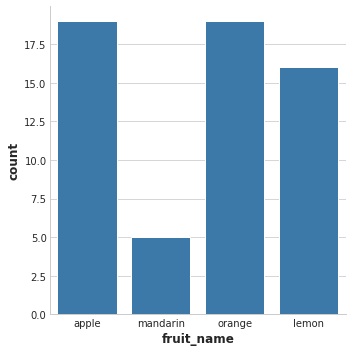

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.catplot(x='fruit_name',  kind='count', color='#2b7bba', data=fruits)
plt.show()


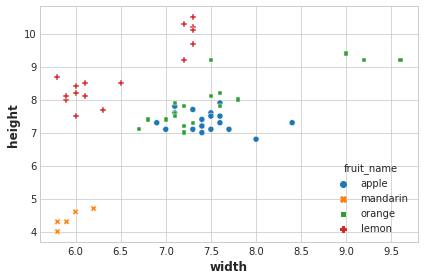

In [ ]:
# Scatter plot 
import seaborn as sns
sns.scatterplot(x="width", y="height",hue="fruit_name", style="fruit_name", data=fruits)
plt.show()

In [ ]:
# Descriptive Statistics 
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [ ]:
#Create a feature list and y
import numpy as np
from sklearn.preprocessing import LabelEncoder
feature_names = ['mass','height' ,'width' , 'color_score' ]
X = fruits[feature_names]
y = fruits['fruit_name']
y = LabelEncoder().fit_transform(y)
#split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.3,random_state=0)


In [ ]:
X_train[0:6]


,mass,height,width,color_score
14,152,7.3,7.6,0.69
32,164,7.0,7.2,0.80
49,132,8.7,5.8,0.73
29,160,7.4,7.0,0.81
37,154,7.3,7.3,0.79
56,116,8.1,5.9,0.73


In [ ]:
y_train_raw[:6]


array([0, 3, 1, 3, 3, 1])

In [ ]:
y_test_raw

array([3, 3, 1, 3, 0, 0, 3, 1, 3, 0, 2, 0, 3, 3, 3, 3, 1, 2])

Transform the y variable to a binary matrix using to_categorical function. 

In [ ]:
from tensorflow.keras.utils import to_categorical
# covert the target variable from one column vector to a four-column binary matrix
y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)


In [ ]:
y_train[:6]

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test[:6]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

Let us build a two hidden layer neural network model using 'Relu' activation function and 'softmax' activation function. 

## Activation Functions


Seven types of activaiton functions.

1. Binary Step Function
2. Linear Function
3. Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).
4. Hyperbolic Tangent Function, (exp(x)-exp(-x))/((exp(x)+exp(-x))
5. ReLU (Rectified Linear Unit), max(0, w * x + b)
6. Leaky ReLU
7. Softmax Function, The softmax of each vector x is computed as exp(xi) / sum(exp(x1)+...+exp(xm)). It is used in the output layer to handle the classification problem.

Next plot shows the relu activation function. 
reference: https://keras.io/api/layers/activations/



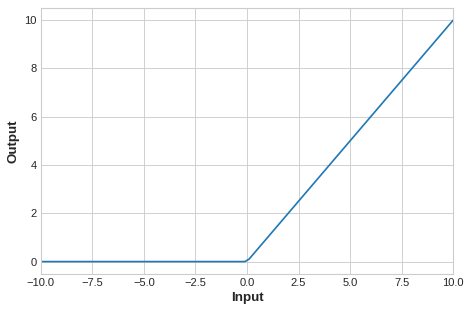

In [ ]:
import tensorflow as tf
# Setup plotting
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish', 'sigmoid' ... or something else
activation_layer = layers.Activation('relu')

x = tf.linspace(-10.0, 10.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=80)
plt.plot(x, y)
plt.xlim(-10, 10)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


Next，let us build the model.

**Confusion matrix**: a table to describe the performance of a classification model (or “classifier”) on the test data set for which the true values are known. It allows the visualization of the performance of an algorithm.

**Accuracy**: the ratio of number of correct predictions to the total number of input samples.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# create model
model = Sequential([
    # the hidden ReLU layers
    layers.Dense(units=10, activation='relu', input_shape=[4]),
    layers.Dense(units=10, activation='relu'),
    #layers.Dense(units=10, activation='relu'),
    # the linear output layer 
    layers.Dense(units=4, activation='softmax'),
])
    
# compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


1. first layer: We have 4 input variables and 10 nodes, so there are  4 $\times$ 10 + 10 (bias)= 50 parameters.
2. Second layer: we have 10 input variables and 10 nodes, 10 $\times$ 10 + 10 =110. 
3. Third layer:  we have 10 input variables and 4 nodes, 10 $\times$ 4 + 4 = 44. 

In [ ]:
# fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100,
                    verbose=0)

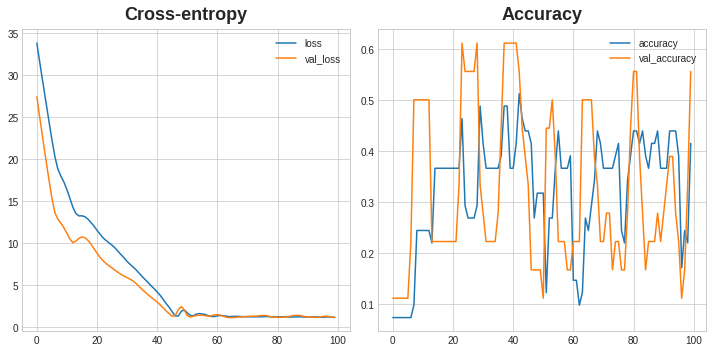

In [ ]:
import pandas as pd
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas to plot methods
figure, axes = plt.subplots(1, 2)
history_df.loc[:, ['loss', 'val_loss']].plot(ax=axes[0], title="Cross-entropy", figsize=(10,5))
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(ax=axes[1], title="Accuracy")
plt.show()

In [ ]:
#y_pred = model.predict(X_test)
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

#print(y_pred)

1/1 [==============================] - 0s 20ms/step - loss: 1.1708 - accuracy: 0.5556
Test score: 1.1708128452301025
Test accuracy: 0.5555555820465088


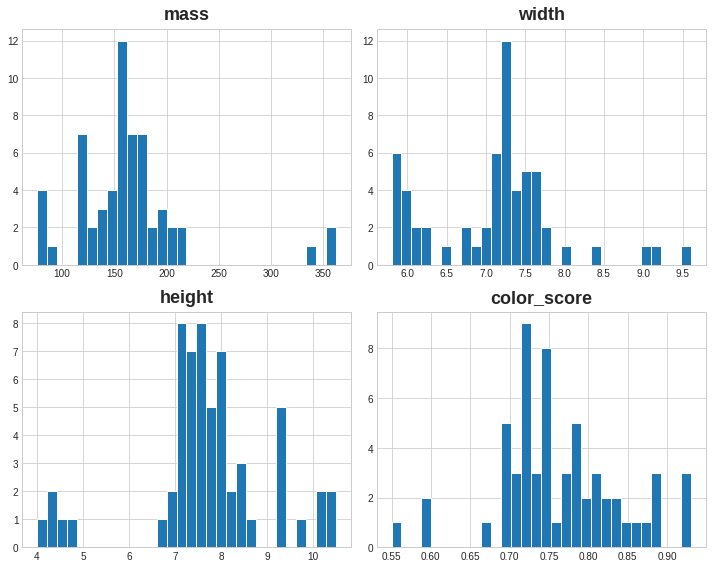

In [ ]:
#histogram for each numeric imput variable
from scipy.stats import norm
fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(10,8))
plt.show()

Some numerical values do not have the same scale, so we need to scale them. We scale the training data and then apply scaler to the test set, because in practice you are not provided with test data and you just have to evaluate your model on test data.

Here we use normlization, which rescales the dataset such that all feature values with mean of 0 and standard deviation of 1. 





In [ ]:
#Use scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

Fit the model again. 

In [ ]:
# fit the model
history = model.fit(X_train_Scaled, y_train, 
                    validation_data=(X_test_Scaled, y_test), 
                    epochs=500,
                    verbose=0)

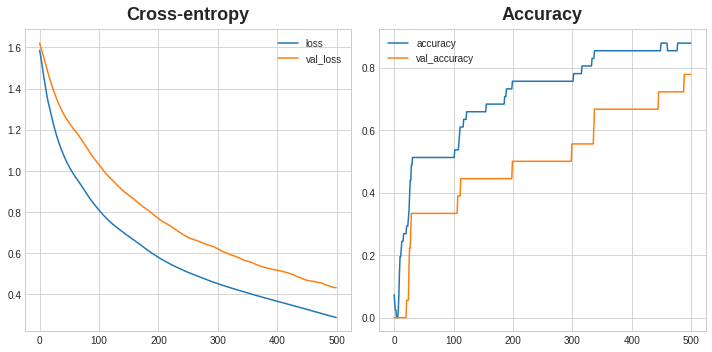

In [ ]:
import pandas as pd
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas to plot methods
figure, axes = plt.subplots(1, 2)
history_df.loc[:, ['loss', 'val_loss']].plot(ax=axes[0], title="Cross-entropy", figsize=(10,5))
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(ax=axes[1], title="Accuracy")
plt.show()

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

1/1 [==============================] - 0s 154ms/step - loss: 206.8272 - accuracy: 0.5000
Test score: 206.82720947265625
Test accuracy: 0.5


The model need to be improved to get a better fit. I will add one more hidden layer with 10 neurons per layer. 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


# create model
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=10, activation='relu', input_shape=[4]),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=10, activation='relu'),
    # the linear output layer 
    layers.Dense(units=4, activation='softmax'),
])
    
# compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 44        
Total params: 314
Trainable params: 314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model
history = model.fit(X_train_Scaled, y_train, 
                    validation_data=(X_test_Scaled, y_test), 
                    epochs=500,
                    verbose=0)


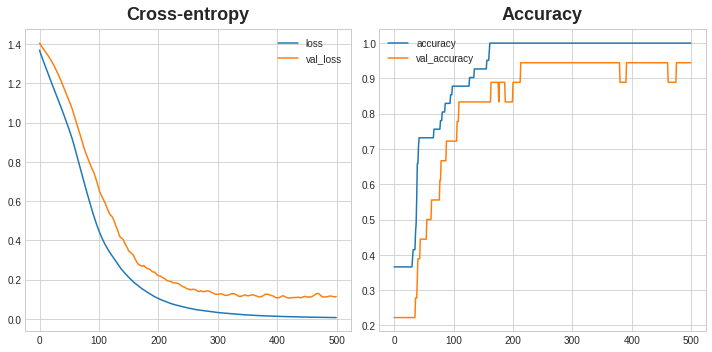

In [ ]:
import pandas as pd
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas to plot methods
figure, axes = plt.subplots(1, 2)
history_df.loc[:, ['loss', 'val_loss']].plot(ax=axes[0], title="Cross-entropy", figsize=(10,5))
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(ax=axes[1], title="Accuracy")
plt.show()

Define a function to determine the predicted class. 

In [ ]:
def predicted_classes(y_pred):
  import numpy as np
  maxInRows = np.amax(y_pred, axis=1)
  n = len(maxInRows)
  predclass =  []
  for i in range(n):
    result = np.where(y_pred[i] == np.amax(maxInRows[i]))
    predclass.append(result[0][0])
  print(predclass)
  #return predclass

In [ ]:
#y_pred = model.predict_classes(X_test_Scaled) # version 2.4 works

y_pred = model.predict(X_test_Scaled)
predicted_classes(y_pred)
print(y_test_raw)
score, acc = model.evaluate(X_test_Scaled, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

[3, 3, 1, 3, 0, 0, 3, 1, 3, 0, 2, 0, 3, 3, 3, 0, 1, 2]
[3 3 1 3 0 0 3 1 3 0 2 0 3 3 3 3 1 2]
1/1 [==============================] - 0s 17ms/step - loss: 0.1143 - accuracy: 0.9444
Test score: 0.11431397497653961
Test accuracy: 0.9444444179534912


We can see that the model's validation accuracy remain 95% after 300 iterations. A deeper model (more layers and neurons) provided us a better fit. 

A **deep neural network** consisits of more hidden layers and has a large number of neurons in each layer. 
Deep neural network can take many types of raw data, such as images or text, and automatically extract the necssary features to predict the data better. 

Next we will learn about **Convolutional Neural Network** (CNN) to predict the image data.  

## Convolutional Neural Network (CNN)
1. CNN's input are images 
2. CNN has simliar structure with the typical NN.
2. CNN solve problems involving image recongnition, object detection, etc. 

Referece: https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/

![image](https://drive.google.com/uc?id=1556qvkG2pbpTKeMYIq5huBjomUcCtUuZ&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

Here is a typical structure of a convolutional neural network. The network consists of a series of convolutional, ReLU, and pooling layers as well as a number of fully connected layers which are necessary before the output is generated. 

The input to a convolutional neural network is mostly an (n x m x 1) for grayscale images or an (n x m x 3) for colored images, where the number 3 represents the red, green, and blue components of each pixel in the image. 

![image](https://drive.google.com/uc?id=14zILylpoKXuM7zdTgAXmFeQbvVsWbOoH&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

The values in the image are the pixel values. Now for a (3 x 3) filter with these values, The matrix on the right is to save the results of the convolution process. We start by sliding the filter over the image and computing the dot product between the filter and the overlapping pixel values and storing the result in the right matrix. We repeat this step moving our filter one cell, or one stride is the proper terminology, at a time, and we repeat this until we cover the entire image and fill the right matrix. 

![image](https://drive.google.com/uc?id=150eIDIrIH1uWrcdtr0S9nKPZiPJD0MD1&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

We can also apply more filters to preserve the spatial dimensions. Why we need to use convolution? Why not flatten the input image into an (n x m) x 1 vector and use is as the input? 
If we do that, we will end up with a massive number of parameters that will need to be optimized, and it will be super computationally expensive. Also, decreasing the number of parameters would definitely help in preventing the model from overfitting the training data. Here is the picture looks like after we filter the data. 

![image](https://drive.google.com/uc?id=16wE1mM2kPw2QJvJq0nsZsXTf5Aw_PAYw&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

Next step is the detection step using the ReLU function. This function is much simpler than the convolution, and it will return only postive number or 0s. And you can see it provide a structure of the car. 

![image](https://drive.google.com/uc?id=17UyMx7jByceBfChJBD97aiJSMlmjWOlb&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

The next layer in CNN is the Pooling layer. The pooling layer's main objective is to reduce the spatial dimensions of the data propagating through the network. There are two types of pooling that are widely used in convolutional neural networks. Max pooling and average pooling.  

![image](https://drive.google.com/uc?id=15-cLlT0ZwY0BWDDKOjLCIVR2hCdx61U8&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

In max-pooling which is the most common one, for each section of the image scaned we keep the highest value. Here our filter is moving two strides at a time. Similarly, with average pooling, we compute the average of each area scaned. In addition to reducing the dimension of the data, pooling or max pooling in particular, provides spatial variance which enables the neural network to recognize objects in an image even if the object does not exactly resemble the original object. 

![image](https://drive.google.com/uc?id=17XWL6TJMVchGKRsk_Wkglv1ame8x1UWU&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

Finally, in the fully connected layer, we flatten the output of the last convolutional layer and connect every node of the current layer with every other node of the next layer. 

Next, we will use MNIST dataset from Keras to predict the Handwritten digits.


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


11501568/11490434 [==============================] - 0s 0us/step


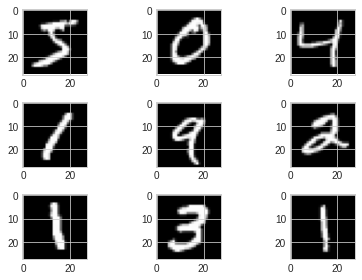

In [ ]:
# import data
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load data
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()


# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train_raw[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()



In [ ]:
# reshape to be [samples][pixels][width][height]
X_train = X_train_raw.reshape(X_train_raw.shape[0], 28, 28, 1).astype('float32')
X_test = X_test_raw.reshape(X_test_raw.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [ ]:
y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)

num_classes = y_test.shape[1] # number of categories

In [ ]:
# create model with one Convolutional layer and one max pooling layer
model3 = Sequential([
    # add Convolutional layer using relu activation
    layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),               
    # maxpooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    # the hidden layers
    layers.Dense(100, activation='relu'),
    # the linear output layer 
    layers.Dense(num_classes, activation='softmax'),
])
   
# compile model
model3.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
# fit the model
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
# Batch_size: The algorithm takes the first 200 samples from the training dataset and trains the network, then takes the second 200 samples, 
# until we have propagated all samples through of the network. 

# evaluate the model
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 19s - loss: 0.3241 - accuracy: 0.9098 - val_loss: 0.1351 - val_accuracy: 0.9590
Epoch 2/10
300/300 - 18s - loss: 0.1083 - accuracy: 0.9689 - val_loss: 0.0746 - val_accuracy: 0.9786
Epoch 3/10
300/300 - 18s - loss: 0.0681 - accuracy: 0.9801 - val_loss: 0.0570 - val_accuracy: 0.9824
Epoch 4/10
300/300 - 18s - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0472 - val_accuracy: 0.9843
Epoch 5/10
300/300 - 18s - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0493 - val_accuracy: 0.9831
Epoch 6/10
300/300 - 18s - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 7/10
300/300 - 18s - loss: 0.0282 - accuracy: 0.9918 - val_loss: 0.0405 - val_accuracy: 0.9857
Epoch 8/10
300/300 - 18s - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0390 - val_accuracy: 0.9867
Epoch 9/10
300/300 - 18s - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0388 - val_accuracy: 0.9869
Epoch 10/10
300/300 - 18s - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.0443 - val_accura

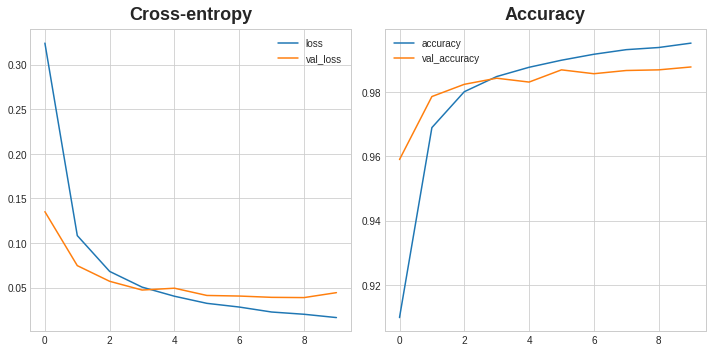

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas to plot methods
figure, axes = plt.subplots(1, 2)
history_df.loc[:, ['loss', 'val_loss']].plot(ax=axes[0], title="Cross-entropy", figsize=(10,5))
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(ax=axes[1], title="Accuracy")
plt.show()

Next, we will creat a CNN model with two convolutional layers and two max pooling layers. 

In [ ]:
# create model with two Convolutional layers and two max pooling layers
model3_2 = Sequential([
    # add Convolutional layer using relu activation
    layers.Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)),               
    # maxpooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # add Convolutional layer using relu activation
                  
    # maxpooling
    
    layers.Flatten(),
    # the hidden layers
    layers.Dense(100, activation='relu'),
    # the linear output layer 
    layers.Dense(num_classes, activation='softmax'),
])
model3_2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
#@title
# hint
#    # add Convolutional layer using relu activation
#    layers.Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)),               
#    # maxpooling
#    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#    # add Convolutional layer using relu activation
#    layers.Conv2D(8, (5, 5),  activation='relu'),               
#    # maxpooling
#    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#    layers.Flatten(),
#    # the hidden layers
#    layers.Dense(100, activation='relu'),
#    # the linear output layer 
#    layers.Dense(num_classes, activation='softmax'),

In [ ]:
# fit the model
history = model3_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model3_2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 25s - loss: 0.4335 - accuracy: 0.8745 - val_loss: 0.1247 - val_accuracy: 0.9616
Epoch 2/10
300/300 - 25s - loss: 0.1162 - accuracy: 0.9645 - val_loss: 0.0974 - val_accuracy: 0.9699
Epoch 3/10
300/300 - 25s - loss: 0.0833 - accuracy: 0.9748 - val_loss: 0.0637 - val_accuracy: 0.9792
Epoch 4/10
300/300 - 25s - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0497 - val_accuracy: 0.9836
Epoch 5/10
300/300 - 24s - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0494 - val_accuracy: 0.9845
Epoch 6/10
300/300 - 24s - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0444 - val_accuracy: 0.9856
Epoch 7/10
300/300 - 24s - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0501 - val_accuracy: 0.9838
Epoch 8/10
300/300 - 24s - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0454 - val_accuracy: 0.9849
Epoch 9/10
300/300 - 24s - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0373 - val_accuracy: 0.9869
Epoch 10/10
300/300 - 24s - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.0372 - val_accura

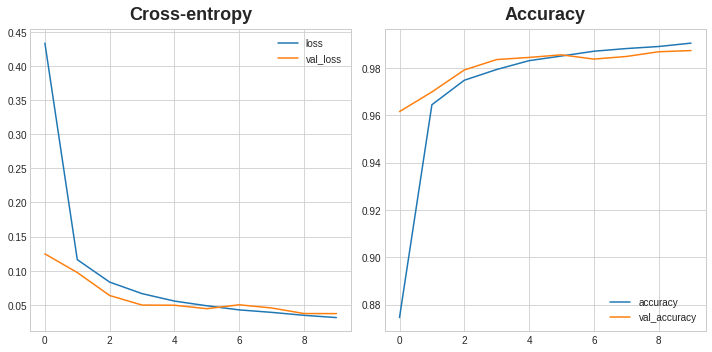

In [ ]:
import pandas as pd
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas to plot methods
figure, axes = plt.subplots(1, 2)
history_df.loc[:, ['loss', 'val_loss']].plot(ax=axes[0], title="Cross-entropy", figsize=(10,5))
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(ax=axes[1], title="Accuracy")
plt.show()

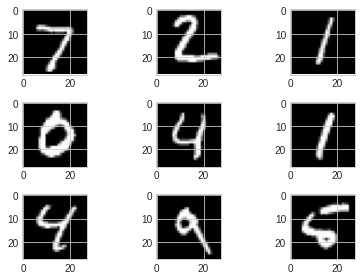

In [ ]:

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_test_raw[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


In [ ]:
#y_pred = model.predict_classes(X_test_Scaled) # version 2.4 works
y_pred = model3_2.predict(X_test[:9])
#print(y_pred)
predicted_classes(y_pred)


[7, 2, 1, 0, 4, 1, 4, 9, 5]


## Pre-Trained Models

Not only can you build your own machine learning models with Keras, but you can use models built by other developers. Keras provides several popular image recognition models built in. 
![image](https://drive.google.com/uc?id=18nq6Al-FGk-x_2yDu6HBiLSvLrYaxpDJ&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)
- VGG (Visual Geometry Group at the University of Oxford)
- ResNet50 (Microsoft Research)
- Inception-v3 (Google)
- Xception (Francois Chollet, author of Keras)

Reference: https://keras.io/api/applications/

Let us use ResNet50 model to predict a picture. 



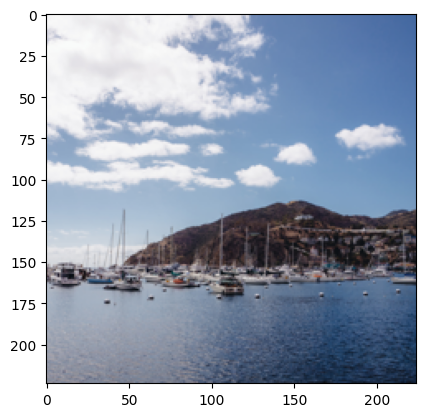

In [ ]:
from PIL import Image
from urllib import request
from io import BytesIO
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

url = 'https://drive.google.com/uc?id=18tqvQsAf6Qa2avOYGOoMPa6Bf9vK6fRP&authuser=xzhu8%40vols.utk.edu&usp=drive_fs'
#url = 'https://drive.google.com/uc?id=198VCj_DDF6UNaVF2zgPCSRF0w-ilbz5_&authuser=xzhu8%40vols.utk.edu&usp=drive_fs'
res = request.urlopen(url).read()
# resize the image to 224 * 224 pixels required by the model
img = Image.open(BytesIO(res)).resize((224,224))

plt.imshow(img)
plt.show()

# covert the image to a numpy array
x = image.img_to_array(img)

# Add a 4th demention to make the image as a list because Keras expects a list of images
x = np.expand_dims(x, axis=0)

x = preprocess_input(x)



In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
model = ResNet50(weights='imagenet')
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
#preds_class = decode_predictions(preds)
predicted_classes = decode_predictions(preds, top=3)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))



This is an image of:
 - seashore: 0.448098 likelihood
 - dock: 0.239681 likelihood
 - lakeside: 0.184838 likelihood


Let us try another figure. 



![image](https://drive.google.com/uc?id=18y5-1L0w7H44oR0Kk0CUh6KJ5MvcuKou&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)





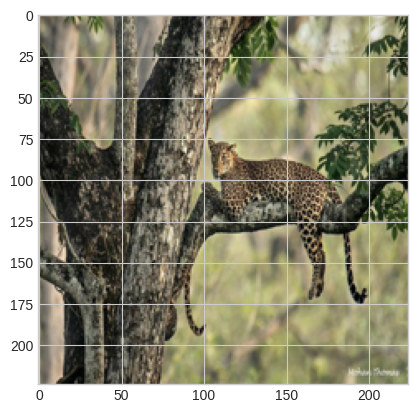

In [ ]:
from PIL import Image
from urllib import request
from io import BytesIO
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults

url = 'https://drive.google.com/uc?id=18y5-1L0w7H44oR0Kk0CUh6KJ5MvcuKou&authuser=xzhu8%40vols.utk.edu&usp=drive_fs'
res = request.urlopen(url).read()
# resize the image to 224 * 224 pixels required by the model
img = Image.open(BytesIO(res)).resize((224,224))
plt.imshow(img)
plt.show()

# covert the image to a numpy array
x = image.img_to_array(img)

# Add a 4th demention to make the image as a list because Keras expects a list of images
x = np.expand_dims(x, axis=0)

x = preprocess_input(x)




In [ ]:
model = ResNet50(weights='imagenet')
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
#preds_class = decode_predictions(preds)
predicted_classes = decode_predictions(preds, top=3)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

This is an image of:
 - leopard: 0.726051 likelihood
 - cheetah: 0.268354 likelihood
 - jaguar: 0.005219 likelihood


# QUESTIONS? 
### In a New Browser Tab

#### http://workshop.utk.edu






In [ ]:
# exercise 10
# We want to see whether the q4 score differs among workshops.
# run the anova test and posthoc test, you can pick tukey or bonferroni 
# to compute the mean comparison. 